In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import Isomap


plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[5,4]

In [2]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.data.shape)
print(digits.target)

X, y = digits.data, digits.target

(1797, 8, 8)
(1797, 64)
[0 1 2 ... 8 9 8]


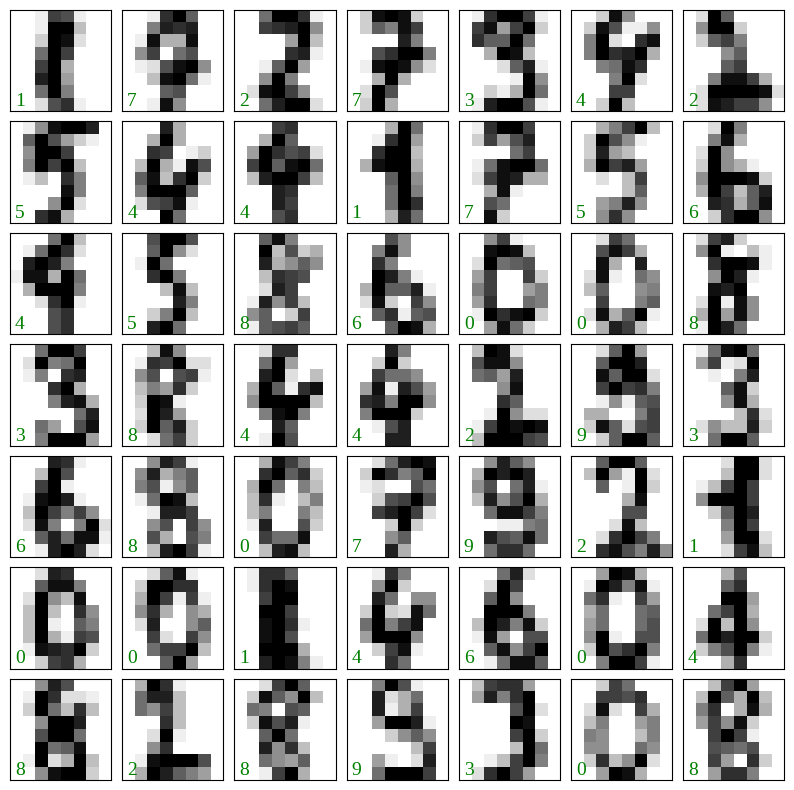

In [3]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

In [4]:
isomap = Isomap(n_components=2)
X_reduced = isomap.fit_transform(X)
X_reduced.shape

/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

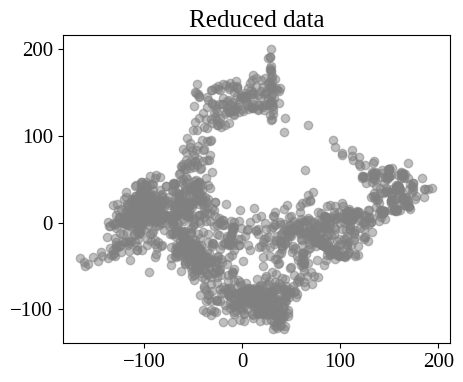

In [50]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c='gray', alpha=0.5)
plt.title('Reduced data')
plt.show()

/tmp/ipykernel_3040/623377114.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.get_cmap('Paired',10), alpha=0.5)


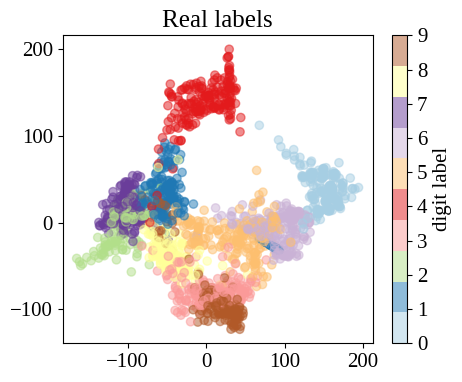

In [39]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.get_cmap('Paired',10), alpha=0.5)
plt.title('Real labels')

plt.colorbar(label='digit label', ticks=range(10))

plt.show()

In [47]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=2, train_size=0.8)
print(Xtrain.shape, Xtest.shape)

(1437, 64) (360, 64)


In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=2000, solver='sag')
lr.fit(Xtrain, ytrain)

# predict labels of both trained and tested data
train_pred = lr.predict(Xtrain)
test_pred = lr.predict(Xtest)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_train = accuracy_score(ytrain, train_pred)
accuracy_test = accuracy_score(ytest, test_pred)

print('The accuracy of the training set is:', accuracy_train)
print('The accuracy of the test set is:', accuracy_test)

cm_train = confusion_matrix(ytrain, train_pred)
cm_test = confusion_matrix(ytest, test_pred)

print('\n Confusion matrix of the training set: \n',  cm_train)
print('\n Confusion matrix of the test set: \n',  cm_test)

The accuracy of the training set is: 1.0
The accuracy of the test set is: 0.9472222222222222

 Confusion matrix of the training set: 
 [[146   0   0   0   0   0   0   0   0   0]
 [  0 138   0   0   0   0   0   0   0   0]
 [  0   0 146   0   0   0   0   0   0   0]
 [  0   0   0 147   0   0   0   0   0   0]
 [  0   0   0   0 146   0   0   0   0   0]
 [  0   0   0   0   0 139   0   0   0   0]
 [  0   0   0   0   0   0 146   0   0   0]
 [  0   0   0   0   0   0   0 139   0   0]
 [  0   0   0   0   0   0   0   0 138   0]
 [  0   0   0   0   0   0   0   0   0 152]]

 Confusion matrix of the test set: 
 [[31  0  0  0  1  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  1  1  0]
 [ 0  0  0  0 31  0  0  0  3  1]
 [ 0  1  0  0  1 41  0  0  0  0]
 [ 0  1  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  0  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  0  1 25]]
